In [31]:
import pandas as pd
import numpy as np
import pickle
from dataproc import DataProc
from cluster_model import ClusterPattern
from clf_model import ClassfyLabel
from pred_model import PredictUsage

In [32]:
# Declare instance for data processing
dp = DataProc()
dp.data

,AveragePower,rn,ss,icsr,dsnw,ct_Ci,ct_Cc,ct_Cs,ct_Ac,ct_As,...,day__5,day__6,weekdays,weekend,wd_x,wd_y,power_yesterday,power_ema4,power_ema7,power_ema14
Time,,,,,,,,,,,,,,,,,,,,,
2022-03-17,1202.191547,2.000000,1.9,9.49,0.0,0,0,4,4,12,...,0.0,0.0,1.0,0.0,0.458353,0.286150,0.000000,143.615676,328.626798,551.934917
2022-03-18,3185.691110,0.000000,0.0,5.17,0.0,1,0,0,0,16,...,0.0,0.0,1.0,0.0,0.845633,0.504936,1202.191547,360.208078,450.402925,614.713854
2022-03-19,2680.142934,24.333333,0.0,4.93,3.1,0,0,0,0,1,...,1.0,0.0,0.0,1.0,0.740897,0.590619,3185.691110,935.671308,826.292532,855.727449
2022-03-20,2703.476586,0.000000,6.3,15.76,0.0,5,0,0,0,3,...,0.0,1.0,0.0,1.0,-0.562075,-0.372296,2680.142934,1289.667253,1077.927046,1022.246499
2022-03-21,3860.051638,0.000000,6.8,16.69,0.0,8,0,7,2,0,...,0.0,0.0,1.0,0.0,-0.293353,0.221860,2703.476586,1575.727165,1296.229157,1172.011553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15,2096.542920,2.133333,0.1,5.35,0.0,0,0,0,1,14,...,0.0,0.0,1.0,0.0,0.855381,0.478153,2320.783620,2295.144532,2234.868922,2173.180031
2023-09-16,1449.364409,30.000000,0.1,6.30,0.0,0,0,0,1,16,...,1.0,0.0,0.0,1.0,0.624741,0.522802,2096.542920,2255.424210,2217.578171,2168.070890
2023-09-17,1532.291780,11.800000,3.3,12.49,0.0,9,0,0,8,1,...,0.0,1.0,0.0,1.0,-0.296609,0.338147,1449.364409,2094.212250,2121.551451,2120.157125


In [3]:
# Dataset that Data augmentation is applied
# X_train, X_test, y_train, y_test = dp.data_augmentation(save=False)
with open('data/augmented_data.pickle', 'rb') as file:
    X_train, X_test, y_train, y_test = pickle.load(file)
# dp.view_figure(dp.augmented_data, figure_type=0, save=True) 
# dp.view_figure(dp.augmented_data, figure_type=0, save=False) 

In [4]:
# Train prediction model
model = PredictUsage()
model.fit(X_train, y_train)

opt_n_estimators,opt_max_depth,opt_learning_rate:  (300, 5, 0.05)
[0.00241765 0.00168873 0.00160607 0.00171626 0.00204994 0.00192467
 0.00216221 0.00188038 0.00205495 0.00362554 0.30951616 0.02410111
 0.00431402 0.00492664 0.02144256 0.01428046 0.01064419 0.00532231
 0.00432308 0.0065674  0.01285265 0.00564824 0.00325133 0.4330685
 0.00463969 0.00266033 0.02541239 0.02283764 0.00692788 0.05613704]


In [5]:
# Predict eletricity usage
y_pred = model.predict(X_test)

In [6]:
# Make DataFrame
pred_result = pd.DataFrame({'true': y_test, 'pred': y_pred}, index=X_test.index)

In [7]:
# Calculate error of each label
error = model.calculate_error(y_test, y_pred)
error

/workspace/AMI/BA/pred_model.py:80: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


{'MAE': 242.77385109730898, 'RMSE': 312.5426299258251, 'MAPE': inf}

<Figure size 1440x576 with 0 Axes>

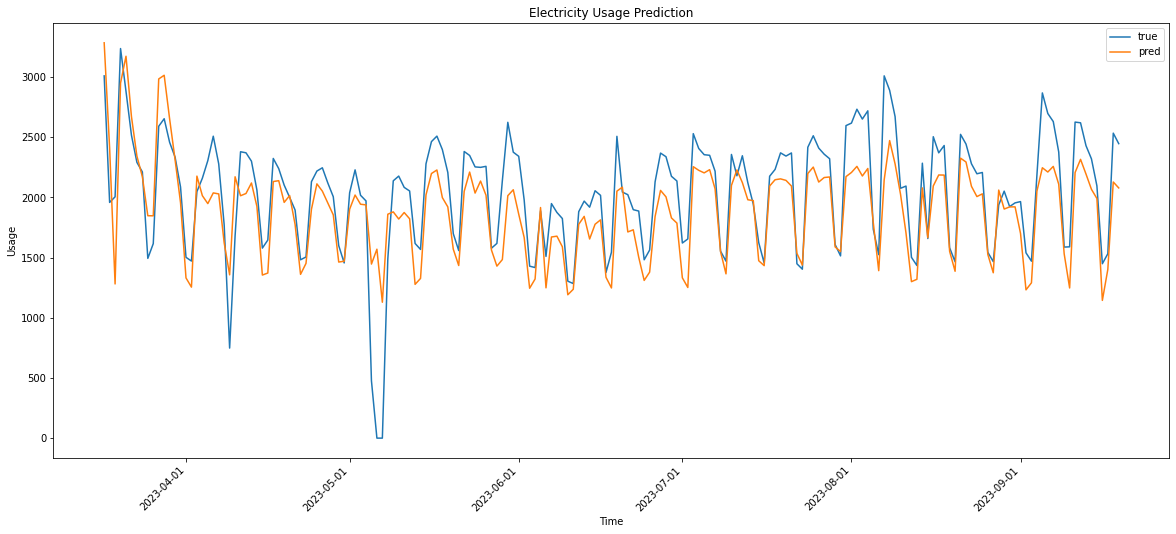

<Figure size 432x288 with 0 Axes>

In [8]:
# Visualize prediction result
dp.view_figure(pred_result, figure_type=2, save=True)
dp.view_figure(pred_result, figure_type=2, save=False)

In [16]:
with open('data/augmented_data.pickle', 'rb') as file:
    X_train, X_test, y_train, y_test = pickle.load(file)

In [10]:
with open('results/pattern_labels.pickle', 'rb') as file:
    labels = pickle.load(file)

In [15]:
labels[labels.label==1].index

DatetimeIndex(['2022-12-01', '2022-12-02', '2022-12-03', '2022-12-06',
               '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-10',
               '2022-12-13', '2022-12-14',
               ...
               '2027-02-15', '2027-02-16', '2027-02-17', '2027-02-18',
               '2027-02-21', '2027-02-22', '2027-02-23', '2027-02-24',
               '2027-02-25', '2027-02-28'],
              dtype='datetime64[ns]', name='Time', length=312, freq=None)

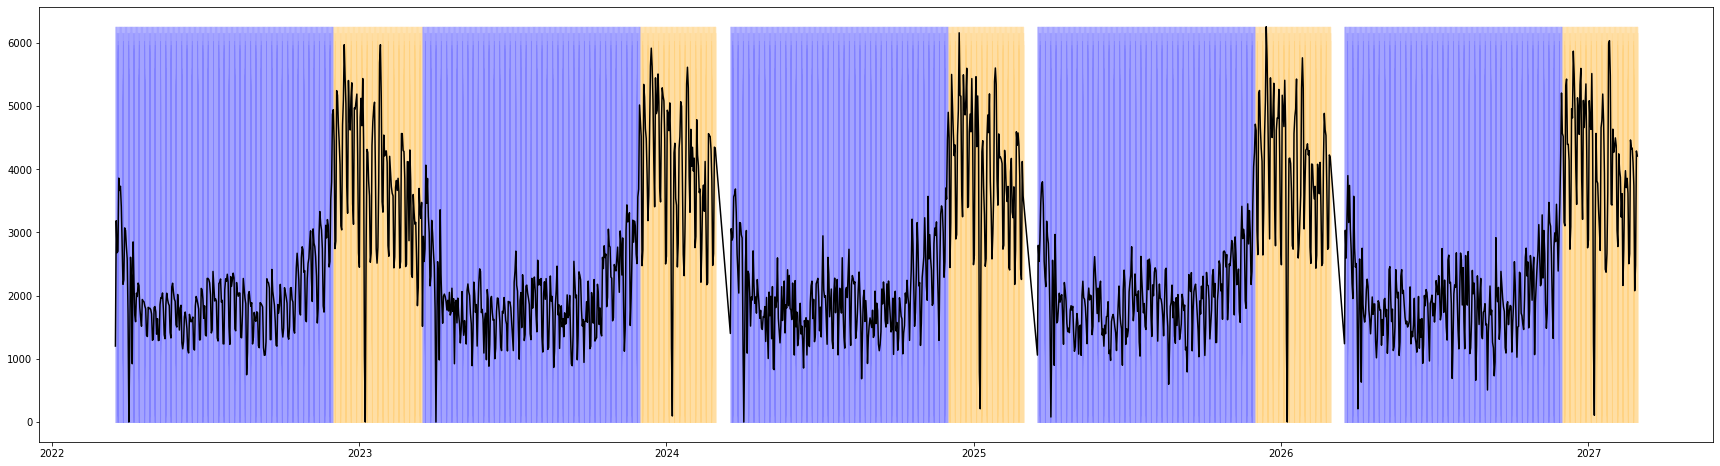

In [30]:
import matplotlib.pyplot as plt

dateTime = np.array(y_train.index)
elec = y_train.values

plt.figure(figsize=(30, 8))
for date in dateTime:
    if labels.loc[date].any() == 0:
        color='b'
    elif labels.loc[date].any() == 1:
        color='orange'
    else:
        color='orange'
    plt.fill_between(date, elec, where=(date > date-np.timedelta64(12, 'h')) & (date < date+np.timedelta64(12, 'h')), color=color, alpha=0.2)
plt.plot(dateTime, elec, 'black')
    
plt.show()

In [17]:
X_train.columns

Index(['dsnw', 'ct_Ci', 'ct_Cs', 'ct_Sc', 'ct_St', 'ws', 'hm', 'dc10Tca',
       'dc10LmcsCa', 'vs', 'ts', 'day_month_x', 'day_month_y', 'day_year_x',
       'month_x', 'month_y', 'day__0', 'day__1', 'day__2', 'day__3', 'day__4',
       'day__5', 'day__6', 'weekdays', 'wd_x', 'wd_y', 'power_yesterday',
       'power_ema4', 'power_ema7', 'power_ema14'],
      dtype='object')

In [18]:
c0 = [0.00377733, 0.00700314, 0.00737818, 0.00929235, 0.00567361, 0.02041276,
 0.01509623, 0.00880643, 0.00958225, 0.01101207, 0.08774935, 0.00839518,
 0.00896444, 0.02735953, 0.06118819, 0.02320827, 0.03053336, 0.02480975,
 0.        , 0.        , 0.01012031, 0.02761507, 0.00646517, 0.29450148,
 0.01399443, 0.00786658, 0.21723431, 0.02682237, 0.02009299, 0.00504488]

c1 = [4.5867618e-03, 1.3391774e-03, 7.6635217e-04, 1.3550181e-03, 1.0998255e-03,
 1.4686845e-03, 1.8241665e-03, 1.4885769e-03, 1.2375650e-03, 3.3632503e-03,
 8.3711138e-03, 6.3959382e-02, 9.3479864e-03, 5.3888052e-03, 6.1256610e-02,
 2.2813570e-04, 2.9124753e-03, 4.0144325e-04, 1.4444489e-03, 1.0659180e-02,
 1.8536340e-02, 1.5817633e-03, 0.0000000e+00, 7.7348226e-01, 5.0568702e-03,
 1.5990807e-03, 1.2808492e-02, 1.7412656e-03, 1.2037606e-03, 1.4912559e-03]

In [35]:
c0 = [0.00241765, 0.00168873, 0.00160607, 0.00171626, 0.00204994, 0.00192467,
 0.00216221, 0.00188038, 0.00205495, 0.00362554, 0.30951616, 0.02410111,
 0.00431402, 0.00492664, 0.02144256, 0.01428046, 0.01064419, 0.00532231,
 0.00432308, 0.0065674 , 0.01285265, 0.00564824, 0.00325133, 0.4330685,
 0.00463969, 0.00266033, 0.02541239, 0.02283764, 0.00692788, 0.05613704]
pd.DataFrame({'Feature Importance':c0}, index=X_train.columns)

,Feature Importance
dsnw,0.002418
ct_Ci,0.001689
ct_Cs,0.001606
ct_Sc,0.001716
ct_St,0.002050
ws,0.001925
hm,0.002162
dc10Tca,0.001880
dc10LmcsCa,0.002055
vs,0.003626


In [36]:
X_train.columns

Index(['dsnw', 'ct_Ci', 'ct_Cs', 'ct_Sc', 'ct_St', 'ws', 'hm', 'dc10Tca',
       'dc10LmcsCa', 'vs', 'ts', 'day_month_x', 'day_month_y', 'day_year_x',
       'month_x', 'month_y', 'day__0', 'day__1', 'day__2', 'day__3', 'day__4',
       'day__5', 'day__6', 'weekdays', 'wd_x', 'wd_y', 'power_yesterday',
       'power_ema4', 'power_ema7', 'power_ema14'],
      dtype='object')

In [19]:
df_feature_importances = pd.DataFrame({'cluster 0':c0, 'cluster 1':c1}, index=X_train.columns)

In [26]:
df_feature_importances['cluster 0'].sort_values()

day__3             0.000000
day__2             0.000000
dsnw               0.003777
power_ema14        0.005045
ct_St              0.005674
day__6             0.006465
ct_Ci              0.007003
ct_Cs              0.007378
wd_y               0.007867
day_month_x        0.008395
dc10Tca            0.008806
day_month_y        0.008964
ct_Sc              0.009292
dc10LmcsCa         0.009582
day__4             0.010120
vs                 0.011012
wd_x               0.013994
hm                 0.015096
power_ema7         0.020093
ws                 0.020413
month_y            0.023208
day__1             0.024810
power_ema4         0.026822
day_year_x         0.027360
day__5             0.027615
day__0             0.030533
month_x            0.061188
ts                 0.087749
power_yesterday    0.217234
weekdays           0.294501
Name: cluster 0, dtype: float64

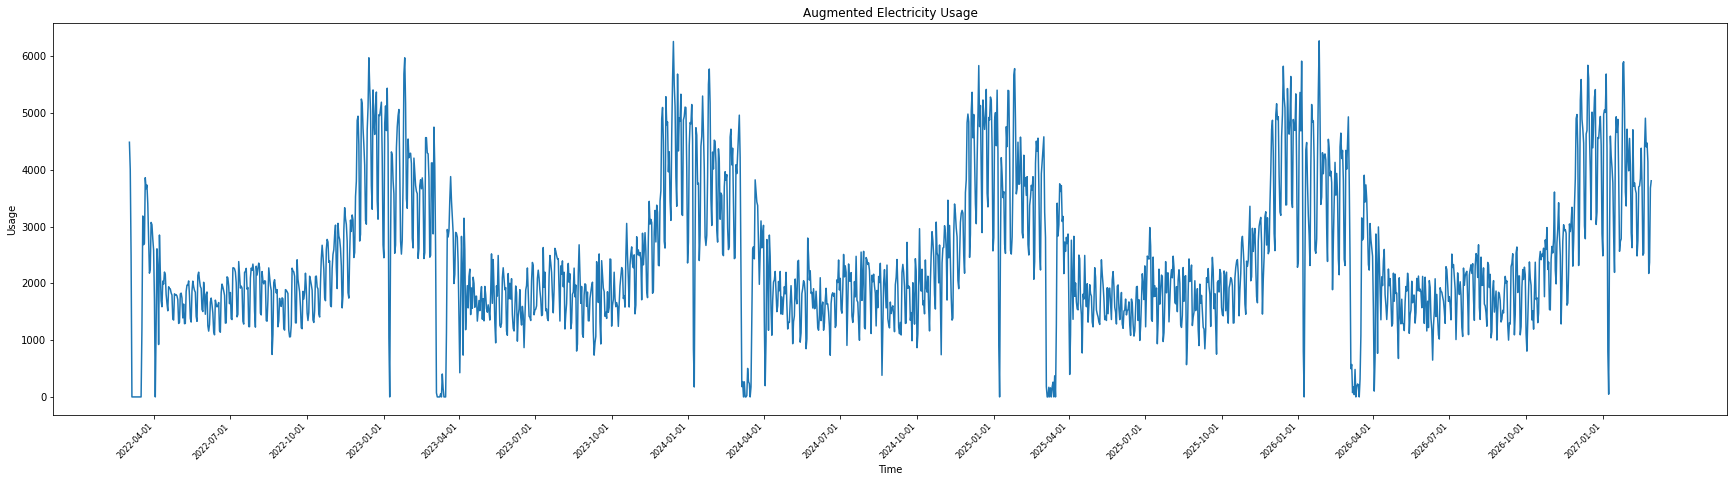

<Figure size 432x288 with 0 Axes>

In [88]:
dp.view_figure(y_train, figure_type=0, save=False)